# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Overall journey wasn’t bad howe...
1,✅ Trip Verified | Overall very satisfied. Gro...
2,✅ Trip Verified | As always when I fly BA it ...
3,✅ Trip Verified | First time using BA busines...
4,Not Verified | Extremely rude ground service....


In [7]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import Word

In [10]:
# Download NLTK stop words data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PAVILION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PAVILION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PAVILION\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
from tqdm import tqdm

def handle_negations(tokens):
    negation_words = set(["not", "no", "never", "none"])

    negation_flag = False
    negated_tokens = []

    # Wrap tokens with tqdm to create a progress bar
    for token in tqdm(tokens, desc="Handling Negations", unit="token"):
        if token.lower() in negation_words:
            negation_flag = True
        elif negation_flag:
            # If a word is within the scope of negation, reverse its sentiment
            negated_tokens.append("not_" + token)
            negation_flag = False
        else:
            negated_tokens.append(token)

    return negated_tokens


In [12]:
from tqdm.notebook import tqdm  # Use tqdm.notebook for Jupyter Notebooks
def clean_review(review):
    # Remove "✅ Trip Verified" and any other unnecessary data
    cleaned_review = re.sub(r'^\d+\s*[,.-]*\s*', '', review)
    cleaned_review = re.sub(r'✅ Trip Verified\s*\|\s*', '', cleaned_review)
    cleaned_review = re.sub(r'not verified\s*\|\s*', '', cleaned_review)
    
    # Remove special characters, numbers, and non-alphabetic characters
    cleaned_review = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_review) 

    # Tokenize and lemmatize
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(cleaned_review)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]

    # Spell correction using TextBlob
    corrected_tokens = [Word(word).correct() for word in lemmatized_tokens]

    # Handle negations
    negated_tokens = handle_negations(corrected_tokens)

    # Join the negated tokens into a string
    cleaned_review = ' '.join(negated_tokens)

    # Convert text to lowercase
    cleaned_review = cleaned_review.lower().strip()

    return cleaned_review

In [13]:
df['cleaned_reviews'] = df['reviews'].apply(clean_review)

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/75 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/82 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/86 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/136 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/74 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/148 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/228 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/149 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/61 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/145 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/90 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/232 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/152 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/130 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/325 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/88 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/252 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/36 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/123 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/50 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/44 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/63 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/229 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/123 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/135 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/96 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/107 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/96 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/43 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/139 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/147 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/168 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/133 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/66 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/125 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/61 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/127 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/138 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/179 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/89 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/119 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/40 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/88 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/263 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/69 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/124 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/97 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/78 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/118 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/132 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/93 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/153 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/164 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/75 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/192 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/23 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/150 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/203 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/61 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/19 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/19 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/236 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/111 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/66 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/106 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/143 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/234 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/116 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/305 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/44 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/112 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/110 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/116 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/65 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/40 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/23 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/59 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/43 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/20 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/111 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/75 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/75 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/345 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/26 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/125 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/112 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/218 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/87 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/71 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/63 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/114 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/105 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/171 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/65 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/108 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/22 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/164 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/40 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/72 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/19 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/169 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/177 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/69 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/78 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/178 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/113 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/143 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/61 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/212 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/71 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/264 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/98 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/100 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/49 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/244 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/41 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/243 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/20 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/99 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/143 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/93 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/74 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/63 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/70 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/170 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/63 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/229 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/221 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/62 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/82 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/22 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/124 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/185 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/106 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/143 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/40 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/55 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/50 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/75 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/80 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/128 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/250 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/114 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/106 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/158 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/108 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/140 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/112 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/69 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/330 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/150 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/79 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/89 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/353 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/180 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/148 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/93 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/74 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/63 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/20 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/72 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/72 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/72 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/268 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/141 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/159 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/20 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/186 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/36 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/20 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/82 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/120 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/66 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/180 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/49 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/165 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/100 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/345 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/84 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/59 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/101 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/86 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/301 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/19 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/160 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/78 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/112 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/241 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/105 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/198 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/55 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/122 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/129 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/19 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/36 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/148 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/78 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/45 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/66 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/59 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/130 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/155 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/41 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/104 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/55 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/104 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/165 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/39 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/74 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/105 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/227 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/102 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/23 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/21 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/123 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/59 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/137 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/151 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/18 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/26 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/39 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/84 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/113 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/99 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/111 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/39 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/105 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/102 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/40 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/137 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/62 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/255 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/203 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/151 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/69 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/146 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/69 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/100 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/141 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/45 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/109 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/118 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/55 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/65 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/115 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/27 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/266 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/116 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/107 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/158 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/66 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/111 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/83 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/190 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/82 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/18 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/79 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/27 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/170 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/131 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/116 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/82 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/44 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/133 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/136 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/142 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/39 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/61 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/176 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/20 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/113 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/165 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/96 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/90 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/106 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/49 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/147 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/93 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/103 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/192 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/96 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/80 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/63 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/19 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/49 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/128 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/93 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/78 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/101 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/296 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/70 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/70 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/189 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/99 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/206 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/149 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/149 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/70 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/225 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/99 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/39 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/23 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/99 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/36 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/107 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/115 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/63 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/65 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/102 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/90 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/87 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/65 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/154 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/162 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/243 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/165 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/130 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/142 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/154 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/176 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/193 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/107 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/100 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/86 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/193 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/62 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/62 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/124 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/62 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/126 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/178 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/61 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/299 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/111 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/107 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/22 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/97 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/101 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/13 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/122 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/100 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/112 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/75 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/82 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/65 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/311 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/72 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/105 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/107 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/141 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/71 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/15 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/84 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/120 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/83 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/50 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/17 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/198 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/80 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/140 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/83 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/96 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/127 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/20 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/236 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/50 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/159 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/27 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/97 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/36 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/18 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/124 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/71 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/20 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/179 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/41 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/81 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/311 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/108 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/71 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/176 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/138 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/125 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/102 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/88 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/123 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/221 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/97 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/69 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/83 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/65 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/87 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/82 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/214 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/134 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/84 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/181 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/174 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/176 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/61 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/71 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/69 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/26 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/97 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/18 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/72 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/122 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/82 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/59 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/89 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/49 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/49 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/106 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/43 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/59 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/87 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/269 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/283 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/59 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/44 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/93 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/62 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/229 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/79 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/27 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/106 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/72 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/80 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/119 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/18 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/87 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/112 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/143 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/21 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/97 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/86 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/104 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/55 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/103 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/20 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/143 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/27 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/118 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/111 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/69 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/39 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/23 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/89 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/124 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/22 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/101 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/29 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/237 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/188 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/45 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/40 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/61 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/62 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/163 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/41 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/141 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/14 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/95 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/75 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/80 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/184 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/205 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/65 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/39 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/45 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/49 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/120 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/131 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/119 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/26 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/98 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/91 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/130 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/22 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/73 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/88 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/44 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/126 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/50 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/138 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/58 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/84 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/106 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/86 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/174 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/118 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/66 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/255 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/176 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/28 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/102 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/86 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/70 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/82 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/78 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/65 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/102 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/191 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/43 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/105 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/119 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/87 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/101 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/142 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/74 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/327 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/96 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/89 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/78 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/99 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/23 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/40 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/44 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/125 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/40 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/200 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/24 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/72 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/40 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/103 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/39 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/135 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/74 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/45 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/162 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/50 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/33 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/274 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/146 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/43 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/74 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/103 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/21 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/107 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/158 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/44 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/71 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/91 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/93 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/189 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/74 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/43 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/250 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/70 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/57 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/153 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/80 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/22 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/78 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/161 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/23 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/97 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/32 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/70 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/224 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/27 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/120 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/30 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/108 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/105 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/105 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/55 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/62 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/46 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/121 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/202 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/70 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/113 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/80 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/173 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/31 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/208 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/62 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/22 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/158 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/114 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/113 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/68 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/34 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/44 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/123 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/39 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/108 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/47 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/22 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/18 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/36 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/92 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/119 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/36 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/123 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/85 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/76 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/25 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/27 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/52 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/87 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/55 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/121 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/70 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/26 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/86 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/228 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/35 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/91 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/49 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/77 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/43 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/38 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/54 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/53 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/67 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/83 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/132 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/130 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/107 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/128 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/22 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/48 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/69 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/164 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/136 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/292 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/121 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/109 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/41 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/89 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/100 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/94 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/37 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/51 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/86 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/83 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/42 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/98 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/60 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/75 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/56 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/19 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/72 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/180 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/64 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/71 [00:00<?, ?token/s]

Handling Negations:   0%|          | 0/164 [00:00<?, ?token/s]

In [44]:
df[['cleaned_reviews']].to_csv("BA_reviews_cleaned.csv", index=False)

In [15]:
df[['reviews', 'cleaned_reviews']].head()

,reviews,cleaned_reviews
0,Not Verified | Overall journey wasn’t bad howe...,not_verified overall journey want bad however ...
1,✅ Trip Verified | Overall very satisfied. Gro...,overall satisfied round staff member yvr extre...
2,✅ Trip Verified | As always when I fly BA it ...,is always i fly of total shame i booked manche...
3,✅ Trip Verified | First time using BA busines...,first time using of business class pleased ser...
4,Not Verified | Extremely rude ground service....,not_verified extremely rude ground service he ...


In [18]:
from textblob import TextBlob

def analyze_sentiment(review):
    blob = TextBlob(review)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score


In [19]:
# Assuming df is your DataFrame with cleaned reviews
df['sentiment_score'] = df['cleaned_reviews'].apply(analyze_sentiment)

In [20]:
df['sentiment_score'].head()

0   -0.150000
1    0.101984
2    0.065556
3    0.249320
4    0.139103
Name: sentiment_score, dtype: float64

In [22]:
import pandas as pd

# Assuming df is your DataFrame with sentiment scores
# df = pd.read_csv("your_data_with_sentiment.csv")

# Set a threshold for positive/negative classification (you can adjust this threshold)
threshold = 0.1

# Create a new column 'sentiment_label' based on the threshold
df['sentiment_label'] = df['sentiment_score'].apply(lambda score: 'positive' if score > threshold else 'negative' if score < -threshold else 'neutral')


In [24]:
# Display the DataFrame with sentiment labels
df[['reviews', 'sentiment_score', 'sentiment_label']].head()

,reviews,sentiment_score,sentiment_label
0,Not Verified | Overall journey wasn’t bad howe...,-0.150000,negative
1,✅ Trip Verified | Overall very satisfied. Gro...,0.101984,positive
2,✅ Trip Verified | As always when I fly BA it ...,0.065556,neutral
3,✅ Trip Verified | First time using BA busines...,0.249320,positive
4,Not Verified | Extremely rude ground service....,0.139103,positive


In [26]:
# Display basic information about the datase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews          1000 non-null   object 
 1   cleaned_reviews  1000 non-null   object 
 2   sentiment_score  1000 non-null   float64
 3   sentiment_label  1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [27]:
# Display the first few rows of the dataset
df.head()

,reviews,cleaned_reviews,sentiment_score,sentiment_label
0,Not Verified | Overall journey wasn’t bad howe...,not_verified overall journey want bad however ...,-0.150000,negative
1,✅ Trip Verified | Overall very satisfied. Gro...,overall satisfied round staff member yvr extre...,0.101984,positive
2,✅ Trip Verified | As always when I fly BA it ...,is always i fly of total shame i booked manche...,0.065556,neutral
3,✅ Trip Verified | First time using BA busines...,first time using of business class pleased ser...,0.249320,positive
4,Not Verified | Extremely rude ground service....,not_verified extremely rude ground service he ...,0.139103,positive


In [28]:
# Display summary statistics
df.describe()

,sentiment_score
count,1000.000000
mean,0.078539
std,0.203835
min,-0.850000
25%,-0.041392
50%,0.063639
75%,0.195549
max,0.875000


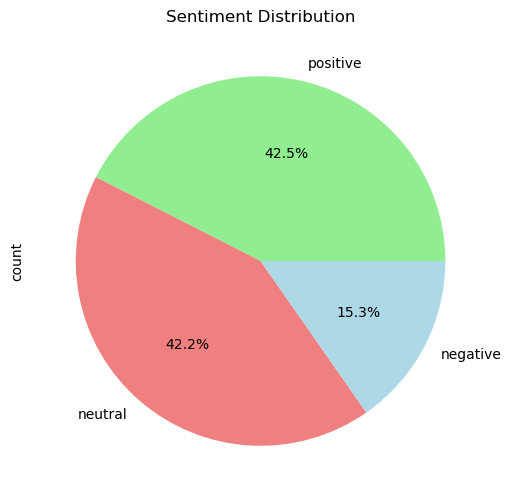

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


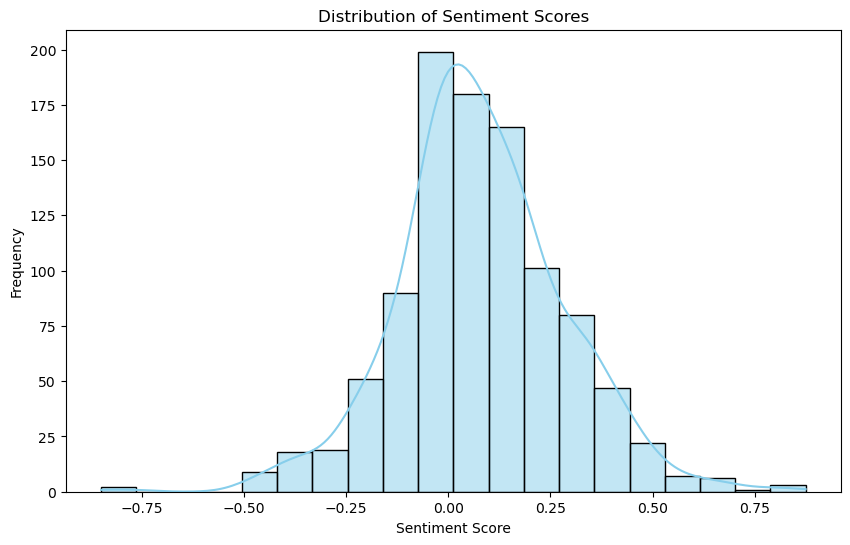

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with sentiment labels
# df = pd.read_csv("your_data_with_sentiment.csv")

# Display a pie chart for sentiment distribution
plt.figure(figsize=(8, 6))
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution')
plt.show()

# Display a bar chart for sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Display descriptive statistics
df['sentiment_score'].describe()

count    1000.000000
mean        0.078539
std         0.203835
min        -0.850000
25%        -0.041392
50%         0.063639
75%         0.195549
max         0.875000
Name: sentiment_score, dtype: float64

In [34]:
# Display count of each sentiment label
df['sentiment_label'].value_counts()

sentiment_label
positive    425
neutral     422
negative    153
Name: count, dtype: int64

In [41]:
# Fine-tune the threshold
new_threshold = 0.05

# Create a new column 'fine_tuned_label' based on the new threshold
df['fine_tuned_label'] = df['sentiment_score'].apply(lambda score: 'positive' if score > new_threshold else 'negative' if score < -new_threshold else 'neutral')

# Display the DataFrame with the fine-tuned labels
df[['reviews', 'sentiment_score', 'fine_tuned_label']].head()


,reviews,sentiment_score,fine_tuned_label
0,Not Verified | Overall journey wasn’t bad howe...,-0.150000,negative
1,✅ Trip Verified | Overall very satisfied. Gro...,0.101984,positive
2,✅ Trip Verified | As always when I fly BA it ...,0.065556,positive
3,✅ Trip Verified | First time using BA busines...,0.249320,positive
4,Not Verified | Extremely rude ground service....,0.139103,positive


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


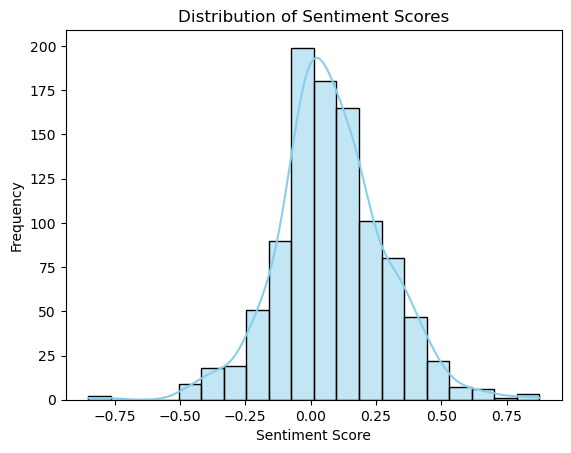

Sentiment Label Counts:
sentiment_label
positive    425
neutral     422
negative    153
Name: count, dtype: int64

Example Positive Review:
✅ Trip Verified |  Overall very satisfied. Ground staff member at YVR was extremely helpful & courteous. A350 was only a few months old, so seats were in good order & comfortable by the standards of a modern day Y class seat, although the very small washroom was already starting to look a bit shabby. Cabin crew very friendly & professional, & meal service carried out at reasonable time in the flight. Choice of 2 options for the main meal which was the same for both legs of my journey 1 month apart. Flight departed on time but unfortunately upon landing at LHR we were unable to deplane for quite some time due to a staffing issue at LHR which so not the fault of the airline, and we were given frequent updates on the situation from the flight manager & the flight deck.

Example Negative Review:
Not Verified | Overall journey wasn’t bad however at the 

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with sentiment scores
# df = pd.read_csv("your_data_with_sentiment.csv")

# Visualize the distribution of sentiment scores
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Display the count of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()
print('Sentiment Label Counts:')
print(sentiment_counts)

# Explore patterns or trends in the data
positive_reviews = df[df['sentiment_label'] == 'positive']['reviews']
negative_reviews = df[df['sentiment_label'] == 'negative']['reviews']

# Display example positive and negative reviews
print('\nExample Positive Review:')
print(positive_reviews.iloc[0])

print('\nExample Negative Review:')
print(negative_reviews.iloc[0])


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(reviews, n_top_words=10):
    vectorizer = CountVectorizer(stop_words='english')
    reviews_matrix = vectorizer.fit_transform(reviews)
    
    # Access feature names directly from the vocabulary
    feature_names = vectorizer.vocabulary_

    # Sort the feature names based on their frequencies
    sorted_feature_names = sorted(feature_names.items(), key=lambda x: x[1])
    
    # Extract the top N words and their frequencies
    top_words = sorted(sorted_feature_names, key=lambda x: reviews_matrix.sum(axis=0)[0, x[1]], reverse=True)[:n_top_words]

    return top_words

# Replace positive_reviews and negative_reviews with your actual data
top_positive_words = get_top_words(positive_reviews)
top_negative_words = get_top_words(negative_reviews)

print('Top words in positive reviews:', top_positive_words)
print('\nTop words in negative reviews:', top_negative_words)


Top words in positive reviews: [('flight', 1756), ('ba', 551), ('verified', 4345), ('trip', 4183), ('good', 1904), ('service', 3626), ('crew', 1173), ('food', 1780), ('time', 4104), ('london', 2465)]

Top words in negative reviews: [('flight', 867), ('verified', 2192), ('ba', 258), ('trip', 2119), ('service', 1832), ('london', 1231), ('british', 341), ('airways', 156), ('airline', 149), ('hours', 1035)]


In [53]:
# Assuming 'threshold' is the threshold for positive/negative classification
def classify_sentiment(score, threshold):
    if score is None:
        return 'unknown'  # Handle None values
    elif score > threshold:
        return 'positive'
    elif score < -threshold:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification to the updated model
df['updated_sentiment_label'] = df['sentiment_score'].apply(lambda score: classify_sentiment(score, threshold))

# Evaluate performance metrics for the updated model
from sklearn.metrics import accuracy_score, classification_report

# Filter out rows with 'unknown' sentiment labels
filtered_df = df[df['updated_sentiment_label'] != 'unknown']

accuracy = accuracy_score(filtered_df['sentiment_label'], filtered_df['updated_sentiment_label'])
classification_rep = classification_report(filtered_df['sentiment_label'], filtered_df['updated_sentiment_label'])

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00       153
     neutral       1.00      1.00      1.00       422
    positive       1.00      1.00      1.00       425

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

